# Credit Card Customer Churn Prediction using ANN

In [162]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [163]:
df = pd.read_csv("Churn_Modelling.csv")

In [164]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [165]:
df.shape

(10000, 14)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [167]:
df.duplicated().sum()

0

In [168]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [169]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [170]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [171]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [172]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [173]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True, dtype=int)

In [174]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [177]:
scaler =  StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.fit_transform(X_test)


In [194]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [179]:
model = Sequential()

In [180]:
model.add(Dense(11, activation="relu", input_dim=11))
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [181]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 11)                132       
                                                                 
 dense_18 (Dense)            (None, 7)                 84        
                                                                 
 dense_19 (Dense)            (None, 1)                 8         
                                                                 
Total params: 224 (896.00 Byte)
Trainable params: 224 (896.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [182]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [183]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 0.5814 - accuracy: 0.7431 - val_loss: 0.4963 - val_accuracy: 0.8075
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.8009 - val_loss: 0.4459 - val_accuracy: 0.8175
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8075 - val_loss: 0.4277 - val_accuracy: 0.8281
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8097 - val_loss: 0.4148 - val_accuracy: 0.8306
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8138 - val_loss: 0.4046 - val_accuracy: 0.8338
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8191 - val_loss: 0.3942 - val_accuracy: 0.8388
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8281 - val_loss: 0.3839 - val_accuracy: 0.8506

In [184]:
import matplotlib.pyplot as plt

In [185]:
history.history

{'loss': [0.5813705325126648,
  0.47985127568244934,
  0.4491468071937561,
  0.433932900428772,
  0.4216659963130951,
  0.4093902111053467,
  0.39534634351730347,
  0.3813064992427826,
  0.37047135829925537,
  0.3618311285972595,
  0.3561369776725769,
  0.3520531952381134,
  0.34868597984313965,
  0.34578102827072144,
  0.34354472160339355,
  0.3410921096801758,
  0.33985477685928345,
  0.3383151590824127,
  0.3374129831790924,
  0.3361538350582123,
  0.3351640999317169,
  0.33419644832611084,
  0.3333335518836975,
  0.3331526815891266,
  0.3319026231765747,
  0.3316725492477417,
  0.3314130902290344,
  0.3307793438434601,
  0.3301791846752167,
  0.32950106263160706,
  0.32951363921165466,
  0.32944321632385254,
  0.3291451632976532,
  0.32854869961738586,
  0.3282715976238251,
  0.3280770480632782,
  0.3274657428264618,
  0.3274418115615845,
  0.32721343636512756,
  0.3268697261810303,
  0.32635918259620667,
  0.3264576196670532,
  0.3264370262622833,
  0.32643231749534607,
  0.325915

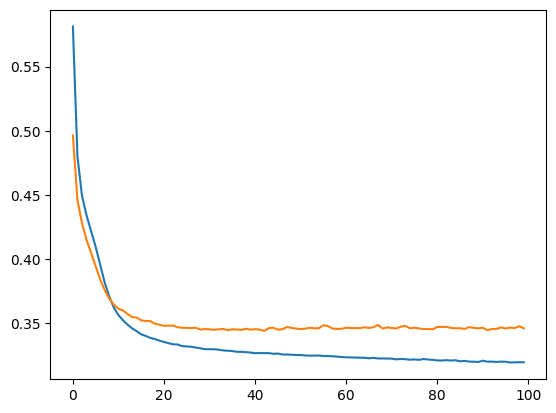

In [186]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

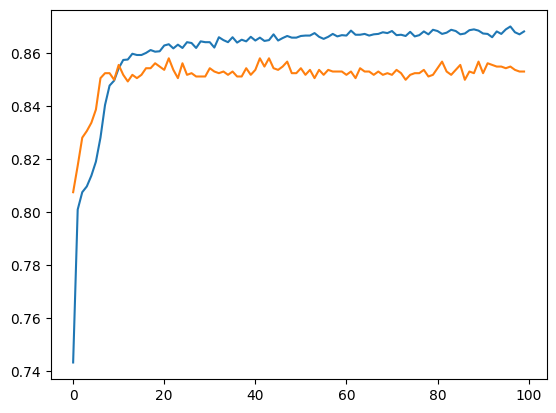

In [187]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [188]:
model.layers[0].get_weights()

[array([[-2.0757040e-01, -2.9026223e-02,  7.5563230e-02,  1.1154655e-01,
          4.1685250e-01, -2.4086270e-01, -6.1850733e-01,  2.8913960e-01,
          3.6497611e-01,  1.5273647e-01, -2.0241545e-01],
        [ 8.2573724e-01,  4.7760835e-01,  3.4441644e-01,  3.2853559e-01,
         -1.4138660e-01,  1.1533315e+00, -7.8567517e-01,  2.6325303e-01,
          5.5597436e-01,  8.4996587e-01, -4.5463391e-02],
        [ 3.4483051e-01,  2.6543304e-01,  1.9569048e-01,  3.0687267e-01,
          1.0684545e-01, -3.4283131e-01, -1.3006496e-01, -2.7190050e-01,
          6.3961990e-02,  1.7974083e-01,  3.2237530e-02],
        [ 6.5030080e-01, -4.6685326e-01,  3.7546244e-01, -5.7469249e-01,
         -6.4043647e-01, -4.7774922e-02, -7.8383887e-01,  2.3212081e-01,
         -1.8798694e-01, -4.8090283e-02, -2.1577778e-01],
        [ 1.1307741e-01, -7.6114160e-01,  9.8680508e-01, -1.1562671e-01,
         -6.5463859e-01, -3.8560379e-01, -2.6902610e-01, -1.7265964e-01,
         -4.5872289e-01,  3.5070500e-0

In [189]:
model.layers[1].get_weights()

[array([[ 0.5565085 ,  0.51690507, -0.03014789, -0.08597623, -0.7201664 ,
         -0.07855266, -0.6943393 ],
        [-0.5038795 ,  0.34130952, -0.6731758 ,  0.22264014,  0.82665646,
          0.04800199,  0.3520475 ],
        [-0.18624088, -0.95167816, -0.2826958 ,  0.5938555 , -0.27676708,
          0.31336498, -0.43720523],
        [ 0.5721055 , -0.88914245,  0.10375554, -0.87622994,  0.09548339,
         -0.4267595 ,  0.2556708 ],
        [-0.26426357, -0.6332666 ,  0.33448446, -0.68301976,  0.4486721 ,
         -0.08817679, -0.26553413],
        [ 0.42466655, -0.30521986, -0.29981774,  0.19611669, -0.1030535 ,
         -0.9037199 , -0.5507044 ],
        [-0.38540423, -0.35573608,  0.02660675, -0.34645304,  0.5423734 ,
          0.37271762, -0.55004114],
        [-1.3218877 , -0.5552372 , -0.09645826, -0.16340248,  0.6261863 ,
          0.11693203, -0.5101476 ],
        [ 0.34444413,  0.1580667 , -0.31838793, -0.38014555,  0.83926636,
          0.58257616,  0.37502605],
        [ 

In [190]:
model.layers[2].get_weights()

[array([[-0.6527674 ],
        [ 1.425501  ],
        [-1.4014502 ],
        [ 1.5038464 ],
        [ 0.65963995],
        [-1.3630487 ],
        [-1.2147055 ]], dtype=float32),
 array([-0.01594505], dtype=float32)]

In [191]:
y_log = model.predict(X_test_Scaled)

63/63 [==============================] - 0s 2ms/step


In [192]:
y_pred = np.where(y_log>0.5, 1, 0)

In [193]:
accuracy_score(y_test, y_pred)

0.861